# Material de apoio

Leitura Sugerida:
1. Statistical Thinking for the 21st Century. Poldrack. Capítulo 13.
Disponível em: https://statsthinking21.github.io/statsthinking21-core-site/hypothesis-testing.html

Leitura Complementar:
1. The Book of Why. Judea Pearl e Dana Mackenzie.

Esse livro é uma ótimo introdução ao pensamento e pesquisa do autor ganhador do Turing Award (equivalente do Nobel na área de computação) que desenvolveu sua carreira pesquisando sobre como estudar causa e efeito.


# Correlação

Na última aula, executamos o nosso primeiro teste estatístico, o **t-test** e o usamos comparar as médias de dois conjuntos de dados diferentes. Vimos que podemos usar o valor p associado ao teste para rejeitar a hipótese nula e fazer inferências a respeito dos nossos dados.

O teste t, porém, não é a ferramenta estatística adequada para investigar todos os problemas. Existem outras ferramentas que nos permitem responder a outras perguntas. Mas nossa interpretação dos testes e modelos estatísticos vai se manter semelhante. Em especial, o uso do valor p para medir a significância estatística da relação observada. Por exemplo, comentamos o uso padrão do p de 0.05 para delimitar a 

Algumas vezes, por exemplo, notamos que dois dados variam juntos: quando um sobe, o outro também tende a subir e quando um desce, o outro também tende a descer. Nesses casos, temos duas variáveis a respeito de uma mesma observação e queremos saber se elas se correlacionam ou não.

Nesta aula, vamos discutir o que é uma correlação, usando dados de um paper recente sobre o conceito de regra e filosofia experimental do direito, [disponível aqui](http://journal.sjdm.org/19/191125/jdm191125.pdf?fbclid=IwAR1HCDmwEXWdGFw5o_GeHuY8x45g2um_dOZpOPt3hq0IAH_Or_krv60HZ8Q).

O paper investiga o conceito ordinário de regra e qual é a influência exercida sobre casos de violação pelo texto e pelo propósito. Nos primeiros experimentos, perguntou-se a uma mesma pessoa sobre se o texto havia sido violado, se o propósito havia sido violado e se a regra em si tinha sido violada. Neles, vimos que texto e propósito importam, mas que o texto importa mais que o propósito. Um problema como essa estratégia é que as próprias perguntas podem influenciar a resposta das pessoas. Pode ser que ser lembrado de que o texto e o propósito são componentes diferentes do conceito de regra faça com que as pessoas se tornem mais formalistas.

Para testar essa hipótese, os autores desenvolveram um estudo onde cada pessoa respondia a apenas uma dimensão (texto, propósito ou regra) sobre cada caso. A ideia era agregar as respostas dadas a cada caso e ver quais eram as **correlações** entre as três variáveis.

In [1]:
import pandas as pd

In [ ]:
experimental_guide = pd.read_csv("https://bit.ly/study3-exp-guide")

experimental_guide.head(        7)

,ResponseId,case,moral,rule_violation,text,EndDate,Duration (in seconds),Finished,consent,idade,...,politica,school,lawyer,anos_formado,periodo,aluno_noel,familiarizado,previous_research,pergunta,flagged_for_exclusion
0,R_0MzzLNxqX4wqy5P,alice4,NaN,NaN,6.0,2018-04-26 22:18:05,226,1,1,18.0,...,2.0,2.0,2.0,NaN,1.0,0,NaN,2,text,0
1,R_0MzzLNxqX4wqy5P,felipe1,NaN,NaN,4.0,2018-04-26 22:18:05,226,1,1,18.0,...,2.0,2.0,2.0,NaN,1.0,0,NaN,2,text,0
2,R_0MzzLNxqX4wqy5P,gui1,NaN,NaN,7.0,2018-04-26 22:18:05,226,1,1,18.0,...,2.0,2.0,2.0,NaN,1.0,0,NaN,2,text,0
3,R_0MzzLNxqX4wqy5P,gui3,NaN,NaN,2.0,2018-04-26 22:18:05,226,1,1,18.0,...,2.0,2.0,2.0,NaN,1.0,0,NaN,2,text,0
4,R_0OmSmAAt0h01ur7,felipe2,5.0,NaN,NaN,2018-04-28 22:58:36,234,1,1,21.0,...,6.0,2.0,2.0,NaN,8.0,1,2.0,2,moral,0
5,R_0OmSmAAt0h01ur7,gui1,2.0,NaN,NaN,2018-04-28 22:58:36,234,1,1,21.0,...,6.0,2.0,2.0,NaN,8.0,1,2.0,2,moral,0
6,R_0OmSmAAt0h01ur7,gui4,7.0,NaN,NaN,2018-04-28 22:58:36,234,1,1,21.0,...,6.0,2.0,2.0,NaN,8.0,1,2.0,2,moral,0


Acima, carregamos os dados conforme eles foram extraídos da plataforma de questionários. Isso significa que precisamos fazer algumas coisas ainda antes de discutirmos sobre as correlações propriamente ditas. Em particular, os dados atuais possuem uma linha para cada resposta que um participante deu para um caso.

Assim, cada participante aparece 4 vezes na tabela. Por exemplo, se olharmos para o participante "R_0MzzLNxqX4wqy5P", vemos que esse valor se repete nas 4 primeiras linhas. 

Além disso, ele avaliou apenas o texto de cada um dos casos. Por isso, a coluna "text" está preenchida, enquanto as colunas "moral" e "rule_violation" não estão preenchidas. Isso ocorre sistematicamente. Cada pessoa só respondia a uma pergunta sobre o caso, de maneira que na maioria das linhas, esperamos que apenas uma dessas três colunas esteja preenchida. Podemos observar esse fato contando a quantidade de vezes em que o valor está vazio para cada uma das colunas.

In [ ]:
experimental_guide["moral"].isnull().value_counts()

True     472
False    228
Name: moral, dtype: int64

In [ ]:
experimental_guide["text"].isnull().value_counts()

True     440
False    260
Name: text, dtype: int64

In [ ]:
experimental_guide["rule_violation"].isnull().value_counts()

True     488
False    212
Name: rule_violation, dtype: int64

Para resolver esse problema, vamos agrupar os dados por cenário. Assim, vamos extraír a média para cada uma das três variáveis em cada caso descrito para os participantes. Nosso resultado será ter uma médida do quanto eles avaliavam que cada camponente era violado por cenário de forma separada: texto, propósito, e a nomra como todo.

In [4]:
cases = experimental_guide.groupby("case", as_index=False)[["text", "moral", "rule_violation"]].mean()

cases.head()

,case,text,moral,rule_violation
0,acc1,2.000000,3.222222,3.583333
1,acc3,6.916667,6.500000,7.000000
2,acc4,1.454545,1.272727,1.333333
3,alice2,5.785714,1.000000,1.818182
4,alice3,4.666667,4.000000,3.000000


Um dos primeiros passos para testar uma correlação é observar como os pontos se comportam em um plano cartesiano. 

Como discutimos no começo da aula, uma correlação envolve duas variáveis a respeito de uma mesma observação. Se queremos investigar a relação entre texto e regra, por exemplo, podemos ver que temos duas variáveis (texto e regra) sobre cada um dos 24 casos que utilizamos. Assim, temos 24 observações e dois atributos destas observações. 

Isso significa que podemos representar a relação entre essas duas variáveis usando um **scatterplot**, um gráfico de pontos que plota cada uma dessas observações em um plano bidimensional tomando as duas variáveis como os eixos X e Y.

Convencionalmente, a nossa **variável dependente**, o fenômeno que queremos entender, é colocada no eixo Y, enquanto a **variável independente ou explicativa**, aquilo que deve explicar a variável dependente, é colocada no eixo X. No caso, queremos explicar o conceito ordinário de regra, ou seja, quais são os fatores que levam alguém a dizer que uma regra foi descumprida. Logo, julgamentos a respeito da regra devem ser incluídos no eixo Y, enquanto julgamentos a respeito do texto da regra serão representados no eixo X. O mesmo pode ser repetido para a relação entre propósito e julgamentos de violação da regra e para a relação entre texto e propósito.

Podemos ver isso a partir de uma linha (regplot). A equação dessa linha é uma forma de descrever a relação entre as variáveis da seguinte forma:

$DV = a*IV + b$

Isso é igual a uma equação básica de retas: $Y = aX + b$. Aqui, $DV$ é a variável dependente, $IV$ é a variável independente.

Vamos falar mais dessa idéia na próxima aula, ao tratarmos de regressão linear. Por enquanto, vamos nos concentrar apenas em visualizar a relação entre as variáveis.

Text(0.5, 1.0, 'Julgamentos de violação à regra como uma função\ndos julgamentos de violação ao texto')

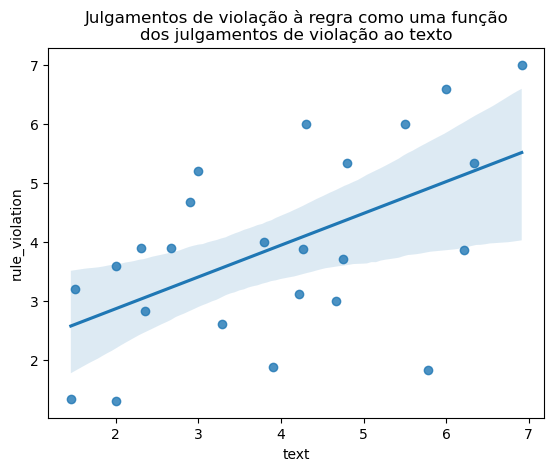

In [5]:
import seaborn as sns



ax = sns.regplot(x="text", y="rule_violation", data=cases)

ax.set_title("Julgamentos de violação à regra como uma função\ndos julgamentos de violação ao texto")

<AxesSubplot: xlabel='moral', ylabel='rule_violation'>

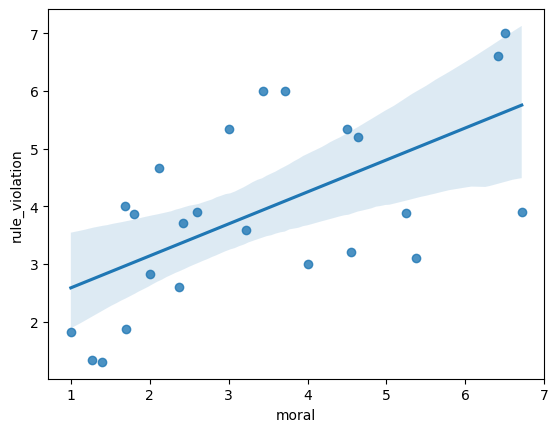

In [12]:
sns.regplot(x="moral", y="rule_violation", data=cases)

<AxesSubplot: xlabel='moral', ylabel='text'>

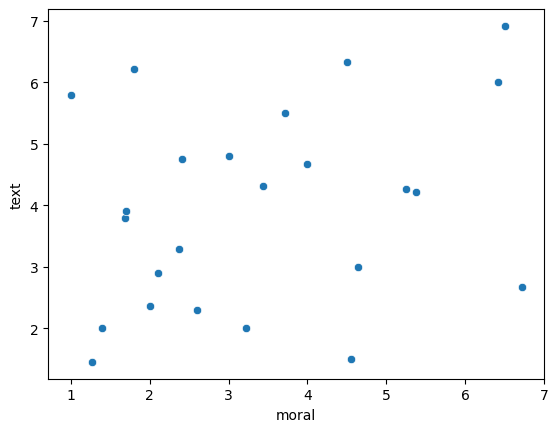

In [13]:
sns.scatterplot(x="moral", y="text", data=cases)

## Realizando o teste estatístico


Assim como podemos quantificar nossa confiança na existência de uma diferença entre duas médias usando o valor p de um t-test, podemos quantificar nossa confiança na existência de uma correlação entre duas variáveis usando o coeficiente de correlação, ou r de Pearson.

In [6]:
from scipy.stats import pearsonr

pearsonr(cases["text"], cases["rule_violation"])

PearsonRResult(statistic=np.float64(0.5489446503291954), pvalue=np.float64(0.005469900673572363))

O teste acima indica um coeficiente de correlação de 0.55 e um valor p de 0.005. Na aula passada, quando discutimos o t-test, olhamos pouco para a estatística t e muito para o valor p. Já discutimos bastante o significado do valor p e, naquela ocasião, comentamos que a estatística t não tinha um significado tão claro. O mesmo não é verdade com relação ao coeficiente de correlação: ele é uma medida fácil de interpretar, clara e muito útil.

<img src=https://www.mathsisfun.com/data/images/correlation-examples.svg style = "width:80%">
<br>
<center> <i> Fonte: Pierce, Rod. (22 Jan 2020). "Correlation". Math Is Fun. Retrieved 27 Apr 2020 from http://www.mathsisfun.com/data/correlation.html </i> </center>



O coeficiente de correlação é importante para sabermos qual é a força de uma relação, ou seja, o quão próximos de uma linha estão todos os pontos, mas não é muito bom para nos dizer qual é a magnitude da relação, i.e., o quão inclinada é a linha. Para a pesquisa, era importante conhecer também este dado. Afinal, dizer que o texto da regra influencia mais os julgamentos que as pessoas fazem a respeito de seu cumprimento do que o propósito envolve comparar a inclinação destas duas linhas. Veremos como fazer isso em breve.

> OBS.: muito embora uma correlação alta seja indicativa de uma relação entre as duas variáveis, não podemos inferir disso que uma variável *causa* a outra. Um dos slogans mais famosos da estatística é: **correlação não implica causalidade**. [Esse site](http://www.tylervigen.com/spurious-correlations) contém vários exemplos de "correlações espúrias", casos nos quais duas variáveis se correlacionam, mas não temos nenhuma razão para crer que uma seja causa da outra. Assim, sempre precisamos de razões teóricas sólidas que acompanhem a nossa observação estatística para embasar inferências relativas à causalidade. No nosso caso, por exemplo, antes mesmo de observar os dados, já havíamos levantado a carga de trabalho como possível causa dos atrasos na apreciação das medidas liminares.

## Desafio

O desafio é calcular e interpretar as correlações entre propósito e violação à regra e entre propósito e texto.

Olhando o resultado dos 3 testes, o que isso sugere sobre a relação entre violação do propósito e texto com a violação da regra como um todo?

In [ ]:
#seu código aqui
